In [1]:
library(tidyverse)
library(data.table)
library(RColorBrewer)
library(MetBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## Read in filtered 6-base data

In [6]:
modC_0day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/datamodC_0day_data.tsv")
modC_4day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/datamodC_4day_data.tsv")
modC_8day<- read_tsv(file = "/data/hodges_lab/6L_seq/data/datamodC_8day_data.tsv")
head(modC_0day)

Rows: 1610797 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): reg_chr, cluster, peakID, chr
dbl (16): reg_start, reg_end, start, end, p_hmCA, p_mCA, p_unmodCA, p_hmCB, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1385466 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): reg_chr, cluster, peakID, chr
dbl (16): reg_start, reg_end, start, end, p_hmCA, p_mCA, p_unmodCA, p_hmCB, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1707016 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): reg_chr, cluster, peakID, chr
dbl (16): reg_start, reg_end, start, end,

reg_chr,reg_start,reg_end,cluster,peakID,chr,start,end,p_hmCA,p_mCA,p_unmodCA,p_hmCB,p_mCB,p_unmodCB,num_total.x,num_total.y,avg_phmC,avg_pmC,avg_punmodC,cov
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,845744,845944,2,peak7,chr1,845788,845789,0.20833333,0.20833333,0.4583333,0.09090909,0.1818182,0.5454545,24,11,0.14962121,0.19507576,0.5018939,35
chr1,845744,845944,2,peak7,chr1,845808,845809,0.21739130,0.13043478,0.6521739,0.09090909,0.2727273,0.6363636,23,11,0.15415020,0.20158103,0.6442688,34
chr1,966281,966562,3,peak22,chr1,966304,966305,0.00000000,0.31578947,0.6842105,0.00000000,0.6000000,0.2000000,19,5,0.00000000,0.45789474,0.4421053,24
chr1,966281,966562,3,peak22,chr1,966344,966345,0.00000000,0.14285714,0.8571429,0.20000000,0.0000000,0.8000000,21,5,0.10000000,0.07142857,0.8285714,26
chr1,966281,966562,3,peak22,chr1,966374,966375,0.08695652,0.04347826,0.8695652,0.00000000,0.0000000,1.0000000,23,5,0.04347826,0.02173913,0.9347826,28
chr1,966281,966562,3,peak22,chr1,966418,966419,0.08000000,0.08000000,0.8400000,0.00000000,0.0000000,0.8000000,25,5,0.04000000,0.04000000,0.8200000,30


## find average modC values across each peak region 

In [7]:
modC_0day_region<- modC_0day %>% group_by(peakID, cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "0day")
modC_4day_region<- modC_4day %>% group_by(peakID, cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "4day")
modC_8day_region<- modC_8day %>% group_by(peakID,cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "8day")

modC_cluster<- rbind(modC_0day_region, modC_4day_region, modC_8day_region)
hmC_cluster<- pivot_wider(modC_cluster, id_cols = c(peakID, cluster), names_from = time, values_from = reg_avg_hmC)
mC_cluster<- pivot_wider(modC_cluster, id_cols = c(peakID, cluster), names_from = time, values_from = reg_avg_mC)

allmod_cluster<- pivot_longer(modC_cluster, names_to = "mod", values_to = "avg_signal", cols = c(reg_avg_mC, reg_avg_hmC, reg_avg_unmodC))

write_tsv(modC_cluster, "/data/hodges_lab/6L_seq/data/modC_6L_data.tsv")


`summarise()` has grouped output by 'peakID'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peakID'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peakID'. You can override using the
`.groups` argument.


In [16]:
acc<- read_tsv(file ="/data/hodges_lab/NPCdiff_ATACme/data/TCseq_NPCdiff_ATAC_ExpressionTable_allPeak.txt", 
               col_names = c("peak","0hr", "6hr", "12hr", "24hr", "48hr", "72hr", "108hr", "6day", "12day"), 
               skip = 1) 
cluster<- read_tsv(file ="/data/hodges_lab/NPCdiff_ATACme/data/allPeak_annotation_dataframe.tsv") %>% 
    select(1:3,7,8,23) %>%
    separate(col = annotation, into = "annotation2")
acc2<- inner_join(cluster, acc, by = c("peakID" = "peak")) %>% pivot_longer(7:15, names_to = "time", values_to = "acc")
acc2$time <-str_replace(acc2$time,"0hr", "0")
acc2$time <-str_replace(acc2$time,"108hr", "96")
acc2$time <-str_replace(acc2$time,"6day", "192")
prep_acc<- acc2 %>% select(peakID, acc, time, "cluster" = acc_cluster, annotation)

modC_cluster$time <- str_replace(modC_cluster$time,"0day", "0")
modC_cluster$time <- str_replace(modC_cluster$time,"4day", "96")
modC_cluster$time <- str_replace(modC_cluster$time,"8day", "192")
prep_hmC<- modC_cluster %>% select(peakID, "hmC" = reg_avg_hmC, time, cluster)%>% mutate(type = "hmC")

combined<- inner_join(prep_hmC, prep_acc, by = c("peakID", "time", "cluster")) 

combined$cluster <- replace_na(combined$cluster, "static") 

combined$time <- factor(combined$time, levels = c(0,6,12,24,48,72,96,108,144,192,288))
combined$cluster<- factor(combined$cluster, levels = c(3,1,2,6,4,7,5, "static"))
combined_clean<- combined %>% separate(annotation, remove = TRUE, extra = "drop", into = "annotation2")

Rows: 77816 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): peak
dbl (9): 0hr, 6hr, 12hr, 24hr, 48hr, 72hr, 108hr, 6day, 12day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 91428 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): seqnames, strand, meth_cluster, acc_cluster, annotation, transcrip...
dbl (10): start, end, width, geneChr, geneStart, geneEnd, geneLength, geneSt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 1 pieces. Additional pieces discarded in 91428 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `annotation` doesn't exist.


`summarise()` has grouped output by 'cluster'. You can override using the
`.groups` argument.


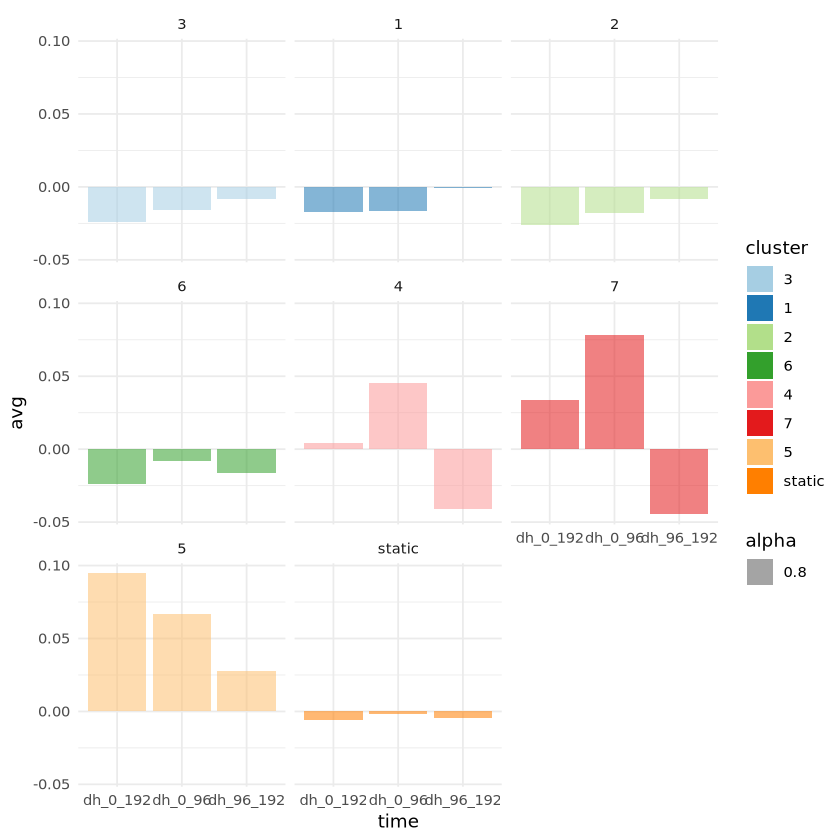

In [17]:
hmc_w<- combined %>% select(-acc) %>% pivot_wider(values_from = hmC, names_from = time) %>% ungroup() %>% drop_na() %>% mutate(dh_0_96 = `96`- `0`, dh_96_192 = `192`-`96`, dh_0_192 = `192`- `0`) 
hmc_l<- hmc_w %>% pivot_longer(cols = 8:10, names_to = "time") %>% group_by(cluster, time) %>% summarise(avg = mean(value))
acc_w<- combined %>% select(-hmC) %>% pivot_wider(values_from = acc, names_from = time) %>% ungroup() %>% drop_na() %>% mutate(da_0_96 = log2(`96`)- log2(`0`), da_96_192 = log2(`192`)-log2(`96`), da_0_192 = log2(`192`)- log2(`0`)) 
both_w<- inner_join(acc_w, hmc_w, by = c("peakID", "cluster", "annotation")) %>% select(peakID, cluster, da_0_192, `0`=`0.y`,`96`=`96.y`,`192`=`192.y`)%>% pivot_longer(cols = 4:6, names_to = "time")

delta_bar<- ggplot(hmc_l, aes(x = time, y = avg, fill = cluster,alpha = 0.8))+
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Paired") +
  facet_wrap(~cluster)+
  theme_minimal()
delta_bar

`summarise()` has grouped output by 'seqnames', 'start', 'end'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames', 'start', 'end'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames', 'start', 'end'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'time'. You can override using the
`.groups` argument.


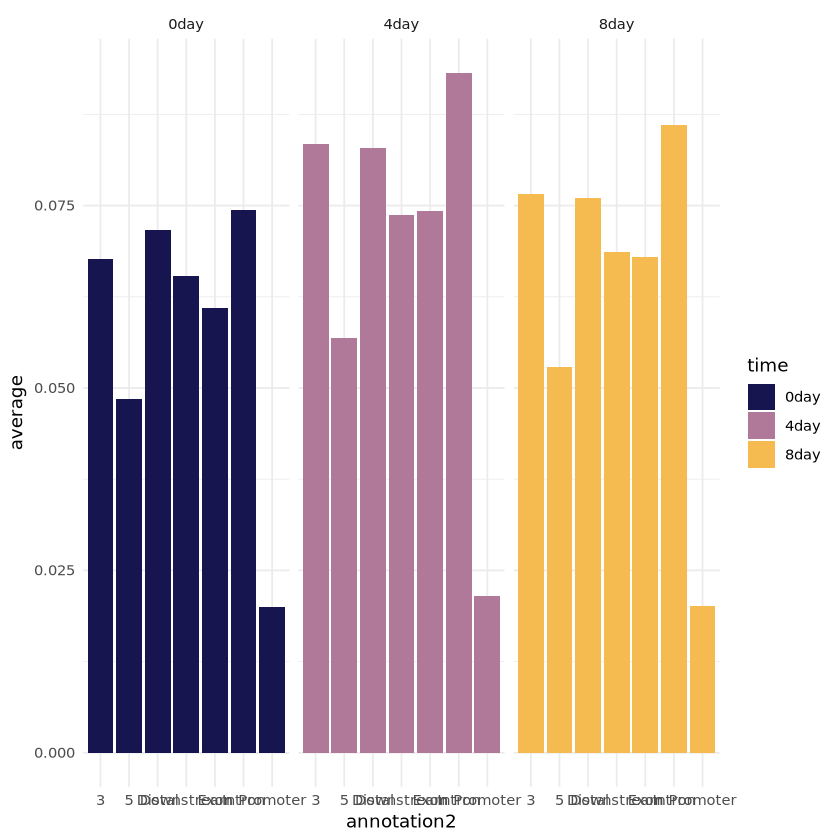

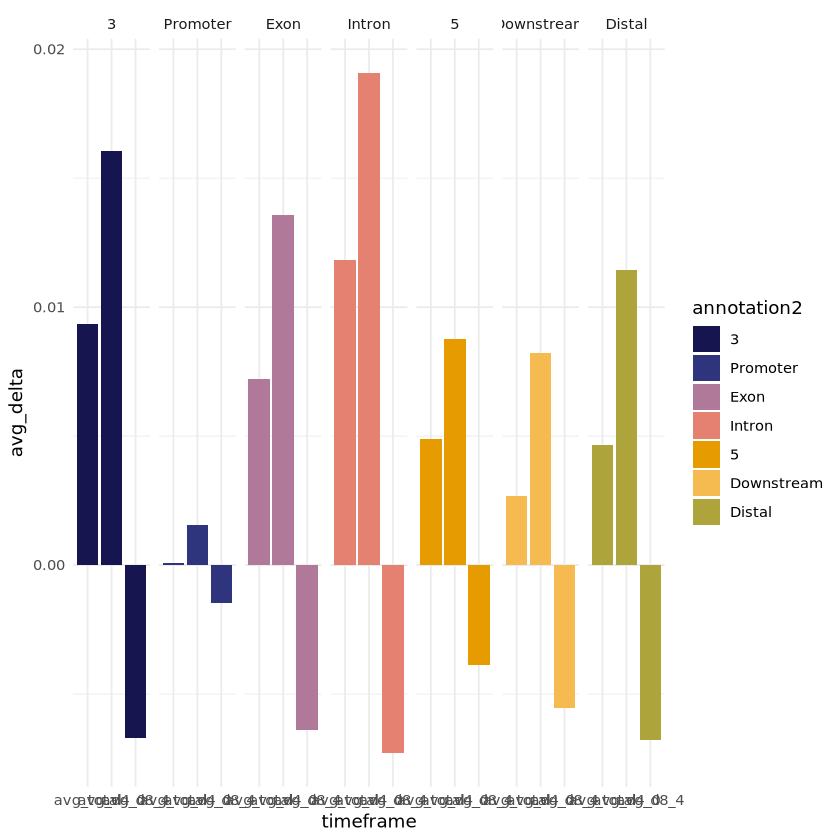

In [19]:
annotation_8dhmC<- inner_join(cluster, modC_8day, 
                              by = c("seqnames" = "reg_chr", "start" = "reg_start", "end"= "reg_end")) %>% 
    group_by(seqnames, start, end, annotation2) %>% summarise(reg_hmC = mean(avg_phmC)) %>% 
    mutate(time = "8day")
annotation_4dhmC<- inner_join(cluster, modC_4day, 
                              by = c("seqnames" = "reg_chr", "start" = "reg_start", "end"= "reg_end")) %>% 
    group_by(seqnames, start, end, annotation2) %>% summarise(reg_hmC = mean(avg_phmC)) %>% 
    mutate(time = "4day")
annotation_0dhmC<- inner_join(cluster, modC_0day, 
                              by = c("seqnames" = "reg_chr", "start" = "reg_start", "end"= "reg_end")) %>% 
    group_by(seqnames, start, end, annotation2) %>% summarise(reg_hmC = mean(avg_phmC)) %>% 
    mutate(time = "0day")

annotation_hmC<- rbind(annotation_0dhmC, annotation_4dhmC, annotation_8dhmC) 
annotation_hmC_sum <- annotation_hmC %>% group_by(time, annotation2) %>% summarise(average= mean(reg_hmC))
hmC_annotation<- ggplot(annotation_hmC_sum)+
  geom_bar(aes(x = annotation2, y = average, fill = time), stat= "identity")+
  facet_wrap(~time)+
  scale_fill_manual(values=met.brewer("Renoir", 3))+
  scale_color_manual(values=met.brewer("Renoir", 3))+
  theme_minimal()
hmC_annotation

annotation_hmC_w<- annotation_hmC%>% pivot_wider(values_from = reg_hmC, names_from = time)%>% 
  drop_na()%>%mutate(d8_0 = `8day`- `0day`, d8_4 = `8day`-`4day`, d4_0 = `4day` - `0day`)
delta_annotation_hmC_sum <- annotation_hmC_w %>% group_by(annotation2) %>% summarise(avg_total = mean(d8_0), avg_d8_4 = mean(d8_4), avg_d4_0 = mean(d4_0))
delta_annotation_hmC_sum_l<- delta_annotation_hmC_sum %>% pivot_longer(cols = 2:4, values_to = "avg_delta", names_to= "timeframe")
delta_annotation_hmC_sum_l$timeframe<- factor(delta_annotation_hmC_sum_l$timeframe, levels = c("avg_total", "avg_d4_0", "avg_d8_4"))
delta_annotation_hmC_sum_l$annotation2<- factor(delta_annotation_hmC_sum_l$annotation2, levels = c("3", "Promoter", "Exon", "Intron", "5", "Downstream", "Distal"))
hmC_annotation_delta<- ggplot(delta_annotation_hmC_sum_l)+
  geom_bar(aes(x = timeframe, y = avg_delta, fill = annotation2), stat= "identity")+
  facet_wrap(~annotation2, nrow = 1)+
  scale_fill_manual(values=met.brewer("Renoir", 7))+
  scale_color_manual(values=met.brewer("Renoir", 7))+
  theme_minimal()
hmC_annotation_delta